<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/18_Noy_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris

In [6]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv')
df.head(1)

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


In [9]:
iris = load_iris()
data = iris.data
target = iris.target

In [17]:
pca_trasnformer = PCA(n_components=3)
pca_dat = pca_trasnformer.fit_transform(data)
pca_dat

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [18]:
pca_trasnformer = PCA()
pca_dat = pca_trasnformer.fit_transform(data)
pca_dat

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
        -6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
        -2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
        -4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
        -4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
        -2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
        -5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
        -1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [20]:
df.head(1)

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


In [22]:
df['od280'].corr(df['total_phenols'])

0.6999493647911861

In [35]:
pca_t = PCA()
pca_data = pca_t.fit_transform(df[['od280', 'total_phenols']])
np.corrcoef(pca_data[:, 1], pca_data[:, 0])[0, 1]

7.847237590428365e-15

In [36]:
pca_t.components_

array([[ 0.76740167,  0.64116665],
       [-0.64116665,  0.76740167]])

In [39]:
data_df = pd.DataFrame(data=data, columns=iris.feature_names)
data_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [48]:
pca = PCA()
pca_data = pca.fit_transform(data_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']])
pca_data[0, :]

array([-2.49088018,  0.32097336, -0.03397453])

In [42]:
pca.n_components_

3

In [49]:
df = sns.load_dataset('iris')
# df = df[df['species'] == 'versicolor']
samples = df.drop(columns=['species', 'petal_length'])

pca = PCA()
pca.fit(samples)

feature = range(pca.n_components_)

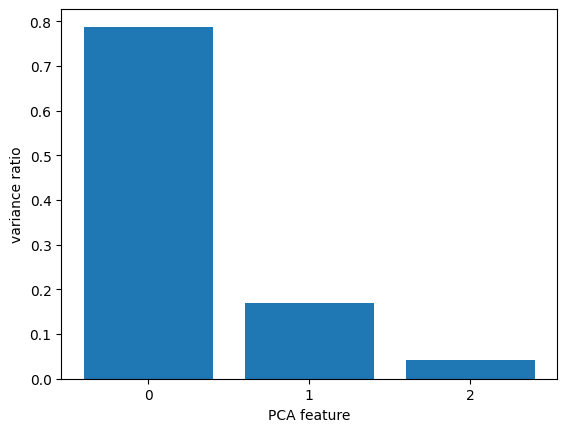

In [50]:
plt.bar(feature, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance ratio')
plt.xticks(feature)
plt.show()

In [54]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

In [55]:
pca_data.shape

(150, 2)

In [53]:
feature = range(pca.n_components_)

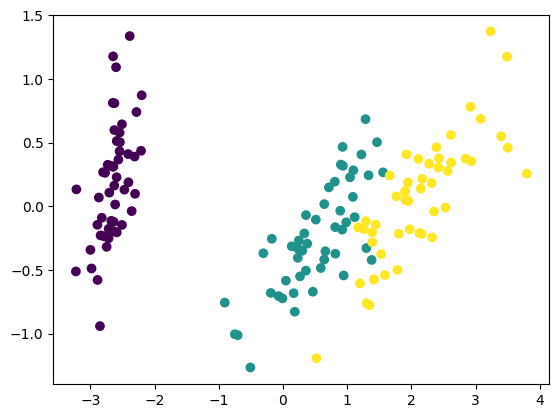

In [57]:
xs = pca_data[:, 0]
ys = pca_data[:, 1]
plt.scatter(xs, ys, c=target)
plt.show()

In [62]:
nmf = NMF(n_components=2)
nmf_data = nmf.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
